In [121]:
import numpy as np
from scipy.stats import expon, norm
from matplotlib import pyplot as plt
import pandas as pd
from statsmodels.stats.weightstats import _zconfint_generic

In [40]:
def print_exp_pdf(lamb, a, b, n):
    # Строим экспоненциальное распределение
    exp_rv = expon(scale=1/lamb)

    x = np.linspace(a, b, (b-a)*8)

    # Генерируем значения из экспоненциального распределения
    vals = exp_rv.rvs(n)

    # Строим теоретическую функцию плотности распределения
    pdf = exp_rv.pdf(x)

    # Строим график
    plt.plot(x, pdf)
    plt.hist(vals, bins=x, density=True)

    plt.ylabel('$p(x)$')
    plt.xlabel('$x$')

    plt.show()

In [51]:
l = 0.5
left, right = 0, 4
size = 10000

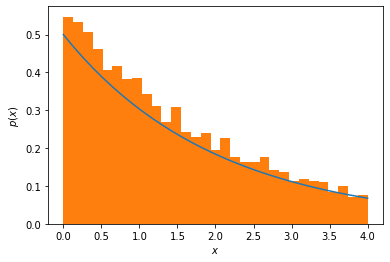

In [53]:
print_exp_pdf(l, left, right, size)

In [54]:
def print_hist_and_norm(mu, scale, x, means, smaple_n):
    # Строим гистограмму по средним выборок
    plt.hist(means, label=f'hist with n = {smaple_n}', density=True)

    # Строим нормальное распределение с параметрами отклонения и среднего выборки средних
    new_dist = norm(loc=mu, scale=scale)

    # Строим график
    pdf = new_dist.pdf(x)
    plt.plot(x, pdf, linewidth=2.5)
    plt.legend()
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title(f"n = {smaple_n}")
    plt.show()

In [56]:
n_arr = [5, 10, 50, 150, 500]

n_sample = 1000

exp_rv = expon(scale=1/l)

x_arr = np.linspace(0, 4, 100)

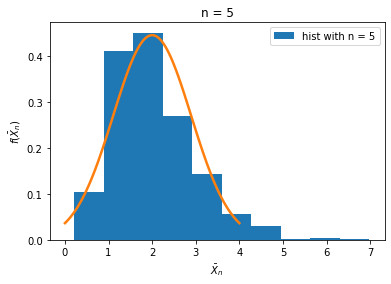

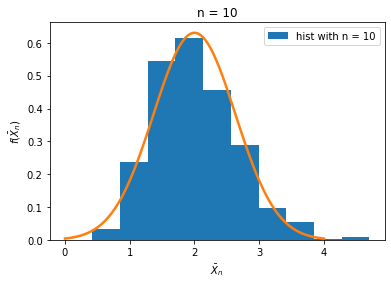

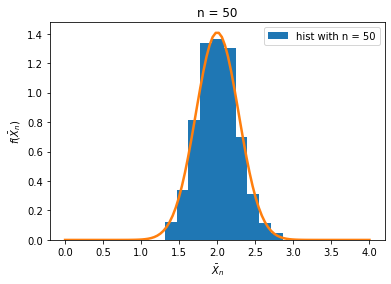

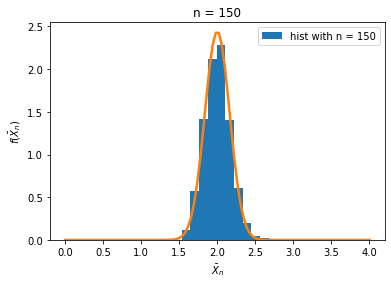

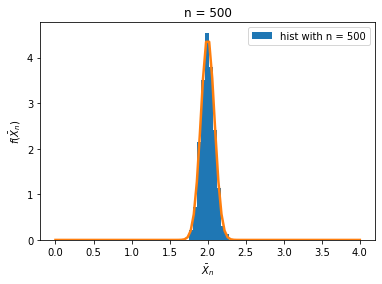

In [57]:
for n in n_arr:
    arr = []
    for _ in range(n_sample):
        arr.append(exp_rv.rvs(n).mean())

    # Высчитываем теоретические средние и отклонение
    # Среднее будет равняться среднему распределения
    # Среднеквадратичное отклонения высчитывает по формуле sqrt(Dx / n), где Dx - дисперсия х
    print_hist_and_norm(exp_rv.mean(), (exp_rv.var()/n)**0.5, x_arr, arr, n)

Аппроксимация работает хорошо с ростом числа реализованых случайных величин

In [62]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [63]:
df.head(15)

state  account length  area code phone number international plan  \
0     KS             128        415     382-4657                 no   
1     OH             107        415     371-7191                 no   
2     NJ             137        415     358-1921                 no   
3     OH              84        408     375-9999                yes   
4     OK              75        415     330-6626                yes   
5     AL             118        510     391-8027                yes   
6     MA             121        510     355-9993                 no   
7     MO             147        415     329-9001                yes   
8     LA             117        408     335-4719                 no   
9     WV             141        415     330-8173                yes   
10    IN              65        415     329-6603                 no   
11    RI              74        415     344-9403                 no   
12    IA             168        408     363-1107                 no   
13    MT              95        510     394-8006                 no   
14    IA              62        415     366-9238                 no   

   voice mail plan  number vmail messages  total day minutes  total day calls  \
0              yes                     25              265.1              110   
1              yes                     26              161.6              123   
2               no                      0              243.4              114   
3               no                      0              299.4               71   
4               no                      0              166.7              113   
5               no                      0              223.4               98   
6              yes                     24              218.2               88   
7               no                      0              157.0               79   
8               no                      0              184.5               97   
9              yes                     37              258.6               84   
10              no                      0              129.1              137   
11              no                      0              187.7              127   
12              no                      0              128.8               96   
13              no                      0              156.6               88   
14              no                      0              120.7               70   

    total day charge  ...  total eve calls  total eve charge  \
0              45.07  ...               99             16.78   
1              27.47  ...              103             16.62   
2              41.38  ...              110             10.30   
3              50.90  ...               88              5.26   
4              28.34  ...              122             12.61   
5              37.98  ...              101             18.75   
6              37.09  ...              108             29.62   
7              26.69  ...               94              8.76   
8              31.37  ...               80             29.89   
9              43.96  ...              111             18.87   
10             21.95  ...               83             19.42   
11             31.91  ...              148             13.89   
12             21.90  ...               71              8.92   
13             26.62  ...               75             21.05   
14             20.52  ...               76             26.11   

    total night minutes  total night calls  total night charge  \
0                 244.7                 91               11.01   
1                 254.4                103               11.45   
2                 162.6                104                7.32   
3                 196.9                 89                8.86   
4                 186.9                121                8.41   
5                 203.9                118                9.18   
6                 212.6                118                9.57   
7               

In [107]:
df = df[["churn", "total day calls"]]

In [108]:
def get_mean(dataframe, has_left):
    return dataframe[dataframe["churn"] == has_left]["total day calls"].mean()

In [109]:
def get_var(dataframe, has_left):
    return dataframe[dataframe["churn"] == has_left]["total day calls"].var(ddof=1)

In [127]:
def get_size(dataframe, has_left):
    return len(dataframe[dataframe["churn"] == has_left])

In [128]:
stayed_mean = get_mean(df, False)
stayed_var = get_var(df, False)
stayed_size = get_size(df, False)

In [129]:
print(stayed_mean, stayed_var)

100.28315789473685 392.0858166300271


In [160]:
left_mean = get_mean(df, True)
left_var = get_var(df, True)
left_size = get_size(df, True)

In [161]:
print(left_mean, left_var)

101.33540372670808 465.7959846395711


In [237]:
def get_conf_interval(size, mean, var, alpha):
    deviation = (var/size)**(1/2)
    q = norm.ppf(1 - alpha/2)

    interval = [mean - q * deviation, mean + q * deviation]

    print(f"{interval[0]} <= u <= {interval[1]} with {(1-alpha) * 100}% probability")

In [238]:
get_conf_interval(stayed_size, stayed_mean, stayed_var, 0.05)

99.55618833318324 <= u <= 101.01012745629045 with 95.0% probability


In [239]:
get_conf_interval(left_size, left_mean, left_var, 0.05)

99.41066229112079 <= u <= 103.26014516229537 with 95.0% probability


In [240]:
_zconfint_generic(stayed_mean, (stayed_var / stayed_size)**(1/2), 0.05, "2s")

(99.55618833318324, 101.01012745629045)

In [241]:
_zconfint_generic(left_mean, (left_var / left_size)**(1/2), 0.05, "2s")

(99.41066229112079, 103.26014516229537)